In [10]:
import pandas as pd
import os
import datetime
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from gensim import models
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
os.getcwd()

'/home/sahil/Supply_Chain/notebooks/Dhanya/emission'

In [3]:
os.listdir('.')

['gt_2013.csv', 'Untitled.ipynb', '.ipynb_checkpoints']

In [4]:
data = pd.read_csv('gt_2013.csv')
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,9.3779,1020.1,90.262,2.3927,19.166,1043.6,541.16,110.16,10.564,9.3472,98.741
1,9.2985,1019.9,89.934,2.3732,19.119,1039.9,538.94,109.23,10.572,11.0160,104.290
2,9.1337,1019.8,89.868,2.3854,19.178,1041.0,539.47,109.62,10.543,10.7500,103.470
3,8.9715,1019.3,89.490,2.3825,19.180,1037.1,536.89,108.88,10.458,12.2870,108.810
4,9.0157,1019.1,89.099,2.4044,19.206,1043.5,541.25,110.09,10.464,9.8229,100.020


In [5]:
data.shape

(7152, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7152 entries, 0 to 7151
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7152 non-null   float64
 1   AP      7152 non-null   float64
 2   AH      7152 non-null   float64
 3   AFDP    7152 non-null   float64
 4   GTEP    7152 non-null   float64
 5   TIT     7152 non-null   float64
 6   TAT     7152 non-null   float64
 7   TEY     7152 non-null   float64
 8   CDP     7152 non-null   float64
 9   CO      7152 non-null   float64
 10  NOX     7152 non-null   float64
dtypes: float64(11)
memory usage: 614.8 KB


In [8]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7152.00000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000,7152.000000
mean,17.60262,1011.999607,80.461624,3.695958,25.105097,1081.569463,545.780885,132.168342,11.971586,2.723031,70.007899
std,6.86289,6.290065,14.125390,0.805829,4.350711,17.385147,7.358935,16.348156,1.132159,2.363913,12.048249
min,0.28985,989.380000,27.504000,2.329500,18.104000,1022.100000,518.320000,101.480000,9.875400,0.005033,43.198000
25%,12.04875,1008.400000,71.493500,3.100350,21.385000,1065.975000,543.745000,118.005000,11.001250,1.257975,62.269000
50%,17.20450,1011.800000,84.002000,3.627850,24.852500,1087.300000,549.900000,133.570000,11.956000,1.782700,68.651000
75%,23.16400,1016.000000,91.579000,4.156825,26.385750,1094.400000,550.030000,135.520000,12.319250,3.591225,76.001500
max,33.87300,1029.700000,100.190000,6.977900,36.950000,1100.500000,550.530000,172.960000,14.867000,35.045000,119.910000


In [14]:
data.corr()

,at,ap,ah,afdp,gtep,tit,tat,tey,cdp,co,nox
at,1.000000,-0.224382,-0.598627,0.583369,-0.043098,0.112788,0.332060,-0.165419,-0.069336,-0.157783,-0.581687
ap,-0.224382,1.000000,-0.019056,0.022045,0.207948,0.163417,-0.236419,0.226761,0.229323,-0.109782,0.096800
ah,-0.598627,-0.019056,1.000000,-0.477844,-0.188930,-0.251603,0.005067,-0.115436,-0.181624,0.247851,0.182527
afdp,0.583369,0.022045,-0.477844,1.000000,0.624854,0.644273,-0.326829,0.540439,0.612137,-0.479581,-0.386677
gtep,-0.043098,0.207948,-0.188930,0.624854,1.000000,0.896211,-0.770147,0.981677,0.996149,-0.642176,-0.024444
tit,0.112788,0.163417,-0.251603,0.644273,0.896211,1.000000,-0.415352,0.917162,0.912384,-0.806942,-0.122998
tat,0.332060,-0.236419,0.005067,-0.326829,-0.770147,-0.415352,1.000000,-0.722024,-0.748264,0.155655,-0.179357
tey,-0.165419,0.226761,-0.115436,0.540439,0.981677,0.917162,-0.722024,1.000000,0.990425,-0.668985,0.040766
cdp,-0.069336,0.229323,-0.181624,0.612137,0.996149,0.912384,-0.748264,0.990425,1.000000,-0.655751,-0.005352
co,-0.157783,-0.109782,0.247851,-0.479581,-0.642176,-0.806942,0.155655,-0.668985,-0.655751,1.000000,0.366217


## Aim

* To build two Regression model to predict the amount of emission of CO and NOx gas separately.
* Find important factors which are contributing to the emission of these gases.

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.columns = data.columns.str.lower()

### CO

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['co'], axis=1),
    data.co,
    test_size=0.2,
    random_state=192)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5721, 10), (1431, 10), (5721,), (1431,))

In [17]:
data.dtypes

at      float64
ap      float64
ah      float64
afdp    float64
gtep    float64
tit     float64
tat     float64
tey     float64
cdp     float64
co      float64
nox     float64
dtype: object

In [20]:
X_train.skew().index

Index(['at', 'ap', 'ah', 'afdp', 'gtep', 'tit', 'tat', 'tey', 'cdp', 'nox'], dtype='object')

In [21]:
for col in ['at', 'ap', 'ah', 'afdp', 'gtep', 'tit', 'tat', 'tey', 
            'cdp', 'nox']:
    
    X_train[col] = X_train[col].astype('float')
    X_test[col] = X_test[col].astype('float')
    
    X_train[col+'_yeo'], param = stats.yeojohnson(X_train[col])
    X_test[col+'_yeo'] = stats.yeojohnson(X_test[col], param)

/root/anaconda3/envs/EDA_2020/lib/python3.7/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/root/anaconda3/envs/EDA_2020/lib/python3.7/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


In [22]:
X_train.head()

,at,ap,ah,afdp,gtep,tit,tat,tey,cdp,nox,at_yeo,ap_yeo,ah_yeo,afdp_yeo,gtep_yeo,tit_yeo,tat_yeo,tey_yeo,cdp_yeo,nox_yeo
6721,17.6160,1005.9,93.803,2.7599,20.100,1057.9,550.31,111.59,10.478,56.334,10.385773,1.689277e+12,216253.156682,0.800142,1.598452,6.213361e+102,5.378882e+152,9.913522,1.088038,1.442187
3421,15.9020,1006.5,93.727,3.0559,19.310,1054.7,549.97,109.83,10.311,63.453,9.577270,1.693591e+12,215744.676270,0.824355,1.589581,5.597452e+102,5.195107e+152,9.853725,1.085858,1.450572
6787,17.4130,1003.7,90.046,3.2632,24.263,1082.3,550.08,129.72,11.717,59.609,10.291065,1.673528e+12,192050.070468,0.839465,1.638179,1.363251e+103,5.253878e+152,10.493610,1.102606,1.446245
2326,10.3430,1015.0,89.169,2.6149,19.254,1044.0,542.47,109.04,10.388,104.460,6.787671,1.755630e+12,186670.399544,0.786957,1.588933,3.939064e+102,2.399769e+152,9.826663,1.086870,1.479699
1970,9.7887,1019.2,89.052,4.3085,33.330,1099.9,527.35,162.43,14.105,65.067,6.491842,1.786919e+12,185960.305359,0.898928,1.698393,2.376756e+103,4.893805e+151,11.408327,1.124580,1.452265


In [23]:
X_test.head()

,at,ap,ah,afdp,gtep,tit,tat,tey,cdp,nox,at_yeo,ap_yeo,ah_yeo,afdp_yeo,gtep_yeo,tit_yeo,tat_yeo,tey_yeo,cdp_yeo,nox_yeo
5049,28.8550,1010.8,54.693,5.1127,26.536,1096.0,549.84,134.99,12.370,68.349,15.287781,1.724762e+12,45377.051787,0.931793,1.656002,2.102932e+103,5.126482e+152,10.651315,1.109308,1.455507
2489,12.5900,1011.9,92.735,3.0710,22.114,1070.5,548.11,123.76,11.274,80.069,7.950608,1.732806e+12,209179.803702,0.825504,1.618995,9.343637e+102,4.293750e+152,10.309663,1.097699,1.465287
3235,22.1930,1001.9,71.907,3.8040,25.359,1089.1,550.19,132.85,12.111,65.695,12.455828,1.660726e+12,100041.275093,0.873199,1.647057,1.691645e+103,5.313302e+152,10.587813,1.106721,1.452906
2273,14.9470,1010.9,89.470,3.3885,24.645,1087.0,550.04,134.08,11.863,69.398,9.117542,1.725492e+12,188505.433394,0.847960,1.641337,1.582795e+103,5.232431e+152,10.624400,1.104157,1.456490
725,9.3145,1008.9,88.841,3.0141,23.986,1082.4,549.30,133.97,11.741,84.768,6.235599,1.710935e+12,184684.214559,0.821135,1.635844,1.367599e+103,4.850831e+152,10.621138,1.102863,1.468582


In [24]:
for col in X_train.columns:
    if (X_train[col].isnull().sum() > 0):
        print(col)

In [25]:
for col in X_train.columns:
    if (X_test[col].isnull().sum() > 0):
        print(col)

In [26]:
X_train.shape, X_test.shape

((5721, 20), (1431, 20))

In [27]:
# the scaler - for robust scaling
from sklearn.preprocessing import Normalizer

# set up the scaler
scaler = Normalizer(norm='l1')
# reset the index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
# fit the scaler
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# transform numpy arrays to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,
                             columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,
                            columns=X_test.columns)

X_train_scaled.columns = [str(col) + '_scaled' for col in 
                          X_train_scaled.columns]
X_test_scaled.columns = [str(col) + '_scaled' for col in 
                         X_test_scaled.columns]

X_train = pd.concat([X_train.reset_index(drop=True),
                    X_train_scaled.reset_index(drop=True)],
                   axis=1)
X_test = pd.concat([X_test.reset_index(drop=True),
                   X_test_scaled.reset_index(drop=True)],
                  axis=1)

X_train.shape, X_test.shape

((5721, 40), (1431, 40))

In [28]:
X_train_scaled.shape, X_test_scaled.shape

((5721, 20), (1431, 20))

In [29]:
X_train.head()

,at,ap,ah,afdp,gtep,tit,tat,tey,cdp,nox,at_yeo,ap_yeo,ah_yeo,afdp_yeo,gtep_yeo,tit_yeo,tat_yeo,tey_yeo,cdp_yeo,nox_yeo,at_scaled,ap_scaled,ah_scaled,afdp_scaled,gtep_scaled,tit_scaled,tat_scaled,tey_scaled,cdp_scaled,nox_scaled,at_yeo_scaled,ap_yeo_scaled,ah_yeo_scaled,afdp_yeo_scaled,gtep_yeo_scaled,tit_yeo_scaled,tat_yeo_scaled,tey_yeo_scaled,cdp_yeo_scaled,nox_yeo_scaled
0,17.6160,1005.9,93.803,2.7599,20.100,1057.9,550.31,111.59,10.478,56.334,10.385773,1.689277e+12,216253.156682,0.800142,1.598452,6.213361e+102,5.378882e+152,9.913522,1.088038,1.442187,3.275030e-152,1.870091e-150,1.743913e-151,5.130992e-153,3.736836e-152,1.966766e-150,1.023094e-150,2.074595e-151,1.947988e-152,1.047318e-151,1.930842e-152,3.140572e-141,4.020411e-148,1.487562e-153,2.971717e-153,1.155140e-50,1.0,1.843045e-152,2.022796e-153,2.681202e-153
1,15.9020,1006.5,93.727,3.0559,19.310,1054.7,549.97,109.83,10.311,63.453,9.577270,1.693591e+12,215744.676270,0.824355,1.589581,5.597452e+102,5.195107e+152,9.853725,1.085858,1.450572,3.060957e-152,1.937400e-150,1.804140e-151,5.882266e-153,3.716959e-152,2.030180e-150,1.058631e-150,2.114105e-151,1.984752e-152,1.221399e-151,1.843518e-152,3.259974e-141,4.152844e-148,1.586792e-153,3.059766e-153,1.077447e-50,1.0,1.896732e-152,2.090155e-153,2.792190e-153
2,17.4130,1003.7,90.046,3.2632,24.263,1082.3,550.08,129.72,11.717,59.609,10.291065,1.673528e+12,192050.070468,0.839465,1.638179,1.363251e+103,5.253878e+152,10.493610,1.102606,1.446245,3.314314e-152,1.910398e-150,1.713896e-151,6.211031e-153,4.618113e-152,2.060002e-150,1.046998e-150,2.469033e-151,2.230162e-152,1.134571e-151,1.958756e-152,3.185319e-141,3.655396e-148,1.597801e-153,3.118037e-153,2.594753e-50,1.0,1.997308e-152,2.098652e-153,2.752719e-153
3,10.3430,1015.0,89.169,2.6149,19.254,1044.0,542.47,109.04,10.388,104.460,6.787671,1.755630e+12,186670.399544,0.786957,1.588933,3.939064e+102,2.399769e+152,9.826663,1.086870,1.479699,4.309998e-152,4.229573e-150,3.715732e-151,1.089646e-152,8.023272e-152,4.350418e-150,2.260509e-150,4.543770e-151,4.328750e-152,4.352919e-151,2.828468e-152,7.315827e-141,7.778681e-148,3.279303e-153,6.621191e-153,1.641435e-50,1.0,4.094837e-152,4.529062e-153,6.166003e-153
4,9.7887,1019.2,89.052,4.3085,33.330,1099.9,527.35,162.43,14.105,65.067,6.491842,1.786919e+12,185960.305359,0.898928,1.698393,2.376756e+103,4.893805e+151,11.408327,1.124580,1.452265,2.000223e-151,2.082633e-149,1.819688e-150,8.803988e-152,6.810652e-151,2.247536e-149,1.077587e-149,3.319094e-150,2.882216e-151,1.329579e-150,1.326543e-151,3.651390e-140,3.799913e-147,1.836870e-152,3.470495e-152,4.856664e-49,1.0,2.331177e-151,2.297966e-152,2.967559e-152


In [30]:
for col in X_train.columns:
    if X_train[col].isnull().sum()>0:
        print(col)

In [31]:
for col in X_test.columns:
    if X_test[col].isnull().sum()>0:
        print(col)

In [32]:
# remove constant and quasi-constant features

quasi_constant_feat = []

for feature in X_train.columns:
    
    predominant = (X_train[feature].value_counts()/np.float(
         len(X_train))).sort_values(ascending=False).values[0]
    
    if predominant > 0.998:
        quasi_constant_feat.append(feature)
        
X_train.drop(columns=quasi_constant_feat, inplace=True)
X_test.drop(columns=quasi_constant_feat, inplace=True)

In [33]:
X_train.shape, X_test.shape

((5721, 39), (1431, 39))

In [34]:
quasi_constant_feat

['tat_yeo_scaled']

In [35]:
# remove duplicated features

duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i%10 == 0:
        print(i)
        
    col_1 = X_train.columns[i]
    for col_2 in X_train.columns[i+1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
X_train.drop(columns=duplicated_feat, inplace=True)
X_test.drop(columns=duplicated_feat, inplace=True)
X_train.shape, X_test.shape

0
10
20
30


((5721, 39), (1431, 39))

In [36]:
X_train.head()

,at,ap,ah,afdp,gtep,tit,tat,tey,cdp,nox,at_yeo,ap_yeo,ah_yeo,afdp_yeo,gtep_yeo,tit_yeo,tat_yeo,tey_yeo,cdp_yeo,nox_yeo,at_scaled,ap_scaled,ah_scaled,afdp_scaled,gtep_scaled,tit_scaled,tat_scaled,tey_scaled,cdp_scaled,nox_scaled,at_yeo_scaled,ap_yeo_scaled,ah_yeo_scaled,afdp_yeo_scaled,gtep_yeo_scaled,tit_yeo_scaled,tey_yeo_scaled,cdp_yeo_scaled,nox_yeo_scaled
0,17.6160,1005.9,93.803,2.7599,20.100,1057.9,550.31,111.59,10.478,56.334,10.385773,1.689277e+12,216253.156682,0.800142,1.598452,6.213361e+102,5.378882e+152,9.913522,1.088038,1.442187,3.275030e-152,1.870091e-150,1.743913e-151,5.130992e-153,3.736836e-152,1.966766e-150,1.023094e-150,2.074595e-151,1.947988e-152,1.047318e-151,1.930842e-152,3.140572e-141,4.020411e-148,1.487562e-153,2.971717e-153,1.155140e-50,1.843045e-152,2.022796e-153,2.681202e-153
1,15.9020,1006.5,93.727,3.0559,19.310,1054.7,549.97,109.83,10.311,63.453,9.577270,1.693591e+12,215744.676270,0.824355,1.589581,5.597452e+102,5.195107e+152,9.853725,1.085858,1.450572,3.060957e-152,1.937400e-150,1.804140e-151,5.882266e-153,3.716959e-152,2.030180e-150,1.058631e-150,2.114105e-151,1.984752e-152,1.221399e-151,1.843518e-152,3.259974e-141,4.152844e-148,1.586792e-153,3.059766e-153,1.077447e-50,1.896732e-152,2.090155e-153,2.792190e-153
2,17.4130,1003.7,90.046,3.2632,24.263,1082.3,550.08,129.72,11.717,59.609,10.291065,1.673528e+12,192050.070468,0.839465,1.638179,1.363251e+103,5.253878e+152,10.493610,1.102606,1.446245,3.314314e-152,1.910398e-150,1.713896e-151,6.211031e-153,4.618113e-152,2.060002e-150,1.046998e-150,2.469033e-151,2.230162e-152,1.134571e-151,1.958756e-152,3.185319e-141,3.655396e-148,1.597801e-153,3.118037e-153,2.594753e-50,1.997308e-152,2.098652e-153,2.752719e-153
3,10.3430,1015.0,89.169,2.6149,19.254,1044.0,542.47,109.04,10.388,104.460,6.787671,1.755630e+12,186670.399544,0.786957,1.588933,3.939064e+102,2.399769e+152,9.826663,1.086870,1.479699,4.309998e-152,4.229573e-150,3.715732e-151,1.089646e-152,8.023272e-152,4.350418e-150,2.260509e-150,4.543770e-151,4.328750e-152,4.352919e-151,2.828468e-152,7.315827e-141,7.778681e-148,3.279303e-153,6.621191e-153,1.641435e-50,4.094837e-152,4.529062e-153,6.166003e-153
4,9.7887,1019.2,89.052,4.3085,33.330,1099.9,527.35,162.43,14.105,65.067,6.491842,1.786919e+12,185960.305359,0.898928,1.698393,2.376756e+103,4.893805e+151,11.408327,1.124580,1.452265,2.000223e-151,2.082633e-149,1.819688e-150,8.803988e-152,6.810652e-151,2.247536e-149,1.077587e-149,3.319094e-150,2.882216e-151,1.329579e-150,1.326543e-151,3.651390e-140,3.799913e-147,1.836870e-152,3.470495e-152,4.856664e-49,2.331177e-151,2.297966e-152,2.967559e-152


In [37]:
X_test.head()

,at,ap,ah,afdp,gtep,tit,tat,tey,cdp,nox,at_yeo,ap_yeo,ah_yeo,afdp_yeo,gtep_yeo,tit_yeo,tat_yeo,tey_yeo,cdp_yeo,nox_yeo,at_scaled,ap_scaled,ah_scaled,afdp_scaled,gtep_scaled,tit_scaled,tat_scaled,tey_scaled,cdp_scaled,nox_scaled,at_yeo_scaled,ap_yeo_scaled,ah_yeo_scaled,afdp_yeo_scaled,gtep_yeo_scaled,tit_yeo_scaled,tey_yeo_scaled,cdp_yeo_scaled,nox_yeo_scaled
0,28.8550,1010.8,54.693,5.1127,26.536,1096.0,549.84,134.99,12.370,68.349,15.287781,1.724762e+12,45377.051787,0.931793,1.656002,2.102932e+103,5.126482e+152,10.651315,1.109308,1.455507,5.628617e-152,1.971723e-150,1.066872e-151,9.973117e-153,5.176260e-152,2.137918e-150,1.072548e-150,2.633190e-151,2.412961e-152,1.333254e-151,2.982120e-152,3.364416e-141,8.851500e-149,1.817607e-153,3.230289e-153,4.102096e-50,2.077705e-152,2.163878e-153,2.839192e-153
1,12.5900,1011.9,92.735,3.0710,22.114,1070.5,548.11,123.76,11.274,80.069,7.950608,1.732806e+12,209179.803702,0.825504,1.618995,9.343637e+102,4.293750e+152,10.309663,1.097699,1.465287,2.932169e-152,2.356681e-150,2.159767e-151,7.152256e-153,5.150276e-152,2.493159e-150,1.276530e-150,2.882329e-151,2.625677e-152,1.864780e-151,1.851670e-152,4.035646e-141,4.871727e-148,1.922571e-153,3.770585e-153,2.176102e-50,2.401086e-152,2.556504e-153,3.412604e-153
2,22.1930,1001.9,71.907,3.8040,25.359,1089.1,550.19,132.85,12.111,65.695,12.455828,1.660726e+12,100041.275093,0.873199,1.647057,1.691645e+103,5.313302e+152,10.587813,1.106721,1.452906,4.176875e-152,1.885645e-150,1.353339e-151,7.159389e-153,4.772738e-152,2.049761e-150,1.035495e-150,2.500328e-151,2.279373e-152,1.236425e-151,2.344272e-152,3.125601e-141,1.882846e-148,1.643421e-153,3.099874e-153,3.183792e-50,1.992699e-152,2.082925e-153,2.734468e-153
3,14.9470,1010.9,89.470,3.3885,24.645,1087.0,550.04,134.08,11.863,69.398,9.117542,1.725492e+12,188505.433394,0.847960,1.641337,1.582795e+103,5.232431e+152,10.624400,1.104157,1.456490,2.856607e-152,1.931989e-150,1.709913e-151,6.475957e-153,4.710047e-152,2.077428e-150,1.051213e-150,2.562480e-151,2.267206e-152,1.326305e-151,1.742506e-152,3.297686e-141,3.602636e-148,1.620585e-153,3.136853e-153,3.024971e-50,2.030490e-152,2.110218e-153,2.783582e-153
4,9.3145,1008.9,88.841,3.0141,23.986,1082.4,549.30,133.97,11.741,84.768,6.235599,1.710935e+12,184684.214559,0.821135,1.635844,1.367599e+103,4.850831e+152,10.621138,1.102863,1.468582,1.920187e-152,2.079850e-150,1.831459e-151,6.213575e-153,4.944720e-152,2.231370e-150,1.132383e-150,2.761795e-151,2.420410e-152,1.747494e-151,1.285470e-152,3.527097e-141,3.807270e-148,1.692773e-153,3.372296e-153,2.819308e-50,2.189550e-152,2.273555e-153,3.027485e-153


In [38]:
# remove correlated features

def correlation(dataset, threshold):
    # set of all the names of correlated columns
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)))


X_train = X_train.drop(columns=corr_features)
X_test = X_test.drop(columns=corr_features)
X_train.shape, X_test.shape

correlated features:  31


((5721, 8), (1431, 8))

In [39]:
X_train.head()

,at,ap,ah,afdp,gtep,tat,nox,tat_yeo
0,17.6160,1005.9,93.803,2.7599,20.100,550.31,56.334,5.378882e+152
1,15.9020,1006.5,93.727,3.0559,19.310,549.97,63.453,5.195107e+152
2,17.4130,1003.7,90.046,3.2632,24.263,550.08,59.609,5.253878e+152
3,10.3430,1015.0,89.169,2.6149,19.254,542.47,104.460,2.399769e+152
4,9.7887,1019.2,89.052,4.3085,33.330,527.35,65.067,4.893805e+151


In [45]:
X_train.gtep.value_counts()

25.006    7
25.269    6
24.390    6
25.397    5
24.984    5
         ..
25.077    1
26.546    1
22.211    1
18.560    1
25.631    1
Name: gtep, Length: 4271, dtype: int64

In [46]:
np.any(np.isnan(X_train.gtep))

False

In [47]:
np.all(np.isfinite(X_train.gtep))

True

In [44]:
X_train.isnull().sum()

at         0
ap         0
ah         0
afdp       0
gtep       0
tat        0
nox        0
tat_yeo    0
dtype: int64

In [40]:
# first step of this procedure
# build ML algorithm using all features
# then determine the importance of features according
# to algorithm
from sklearn.metrics import roc_auc_score, r2_score

model_full = LGBMRegressor(n_estimators=5000,
                                      max_depth=-1,
                                      random_state=192)

model_full.fit(X_train, y_train)

# calculate r2 in the test set
y_pred_test = model_full.predict(X_test)
r2_full = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Test full dataset R2 = %f' % (r2_full))
print('Test RMSE = %f' % (rmse))

Test full dataset R2 = 0.907285
Test RMSE = 0.738360


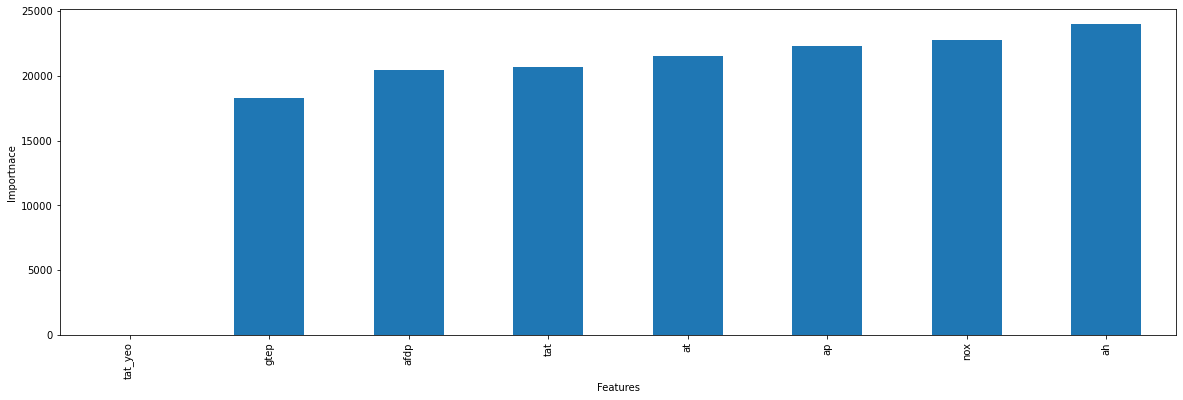

In [41]:
# the second step consist of deriving the importance of
# each feature and ranking them from th eleast to the
# most important

# get feature name and importance
features = pd.Series(model_full.feature_importances_)
features.index = X_train.columns

# sort the features by importance
features.sort_values(ascending=True, inplace=True)

# plot
features.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importnace')
plt.show()

In [42]:
feats = list(features.index)

In [49]:
def do_plotting(y, y_pred, prt_str= ''):
    # this function plots y actual and y predicted for best parameters found
    # this function is called in evlauate_lgbm function
    print(" ")
    print("Size of dataset: ", len(y))
    
    plt.figure(figsize= (15,5))
    sns.set_style("whitegrid")
    # both y_actual and y_pred are plotted on the same plot
    plt.plot(y.tolist(), label = "Actual amount of CO emitted")
    plt.plot(y_pred, label = "Predicted amount of CO emitted with "+ prt_str)
    
    plt.legend(loc = "upper right", prop= {'size': 10})
    
    plt.ylabel("amount of CO emmited for individual dates", size=10)
    
    plt.yticks(range(-20, 100, 20))
    
    plt.show()
    
    return

In [50]:
def check_evaluation_metrics(y, y_pred, p, prt_str = ''):
    # this function is called in evaluate_lgbm function
    # p = no of features ( used for adjusted R2)
    # prt_str = string to be printed in output statements
    
    r2 = r2_score(y, y_pred)
    adj_r2 = 1 - (1-r2) * (len(y)-1) / (len(y)-p-1)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    
    print(f'R2 score with {prt_str}: {r2}')
    print(f'Adjusted R2 score with {prt_str}: {adj_r2}')
    print(f'MSE score with {prt_str}: {mse}')
    print(f'RMSE score with {prt_str}: {rmse}')
    
    return

In [51]:
def evaluate_lgbm(X, y, best_params):
    model = LGBMRegressor(
       learning_rate = best_params['m__learning_rate'],
       max_depth = best_params['m__max_depth'],
       n_estimators = best_params['m__n_estimators'],
       reg_alpha = best_params['m__reg_alpha'],
       reg_lambda = best_params['m__reg_lambda'],
       num_leaves = best_params['m__num_leaves']
    )
    pipeline = make_pipeline(StandardScaler(), model)
    folds = KFold(n_splits=5, shuffle=True, random_state=192)
    y_pred = cross_val_predict(pipeline, X, y, cv=folds)
    
    check_evaluation_metrics(y, y_pred,
                            X.shape[1],
                            prt_str = '5-folds & LGBM')
    
    do_plotting(y, y_pred, prt_str='5-fold & LGBM')
    
    return

In [52]:
def root_mean_squared_error(y_true, y_pred):
    
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)

In [53]:
def run_LGBM(X, y):
    # here the model is called with default parameters
    model= LGBMRegressor()
    pipeline = Pipeline(steps = 
                             [('scaler', StandardScaler()),
                             ('m', model)]
                       )
    param_grid = {
        "m__learning_rate": [ 0.0100, 0.1000, 1.0],
        "m__max_depth": [-1,3,  5,6,7],  
        "m__n_estimators": [1000,4000, 5000],
        'm__reg_alpha': [10,20, 50],
        'm__reg_lambda' : [10, 20, 50],
        'm__num_leaves' : [10, 30]

    }
    # folds ensure that model is less biased in compare to the simple train test split    
    folds = KFold(n_splits = 5, shuffle = True, random_state = 192)            
    
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv = folds,
        n_jobs = -1,
        scoring = make_scorer(root_mean_squared_error, greater_is_better= False),
        verbose = 3,
        refit= True,
        return_train_score = True
    )
    
    grid_search.fit(X, y)
    
    print('Best Hyperparameters: %s' % grid_search.best_params_)
    
    best_params = grid_search.best_params_
        
    result = grid_search.cv_results_
    
    best_index = grid_search.best_index_
    
    mean_test_score = result['mean_test_score']
    mean_train_score = result['mean_train_score']
    # getting mean test and train score for best parameters
    mean_test_score_best = mean_test_score[best_index]
    mean_train_score_best = mean_train_score[best_index]
    
    print("Results of GRID Search CV-")
    print("check train and val score for overfitting for the best params")
    print(f"mean RMSE val scores for best params: {mean_test_score_best}")
    print(f"mean RMSE train scores for best params: {mean_train_score_best}")
    
    print(" ")
    
    print("check train and val score for overfitting for all combinations of params")
    print(f"mean RMSE val scores for all params: {mean_test_score}")
    print(f"mean RMSE train scores for all params: {mean_train_score}")
    
    
    #check evaluation metrics of the best model
    print("Evaluation on train data with CV using best hyper-parameters found using gridsearchCV-")
    evaluate_lgbm(X, y, best_params)
    
    return result, grid_search.best_params_


Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Best Hyperparameters: {'m__learning_rate': 0.01, 'm__max_depth': -1, 'm__n_estimators': 5000, 'm__num_leaves': 30, 'm__reg_alpha': 10, 'm__reg_lambda': 20}
Results of GRID Search CV-
check train and val score for overfitting for the best params
mean RMSE val scores for best params: -0.8743443289697297
mean RMSE train scores for best params: -0.48308402179765453
 
check train and val score for overfitting for all combinations of params
mean RMSE val scores for all params: [-0.96279591 -0.96957608 -0.98965667 -0.97337595 -0.97988988 -0.9999989
 -1.01097421 -1.0163051  -1.02697476 -0.91594266 -0.91710512 -0.93380747
 -0.93610341 -0.94312023 -0.95996702 -1.00602521 -1.00876275 -1.01593079
 -0.89790901 -0.90202546 -0.92033885 -0.9259582  -0.93091689 -0.94142723
 -1.00733727 -1.00886267 -1.0117858  -0.87691759 -0.87685527 -0.88269935
 -0.9086006  -0.91187513 -0.91669328 -1.00362058 -1.00286857 -1.00270154
 -0.89145793 -0.8942495

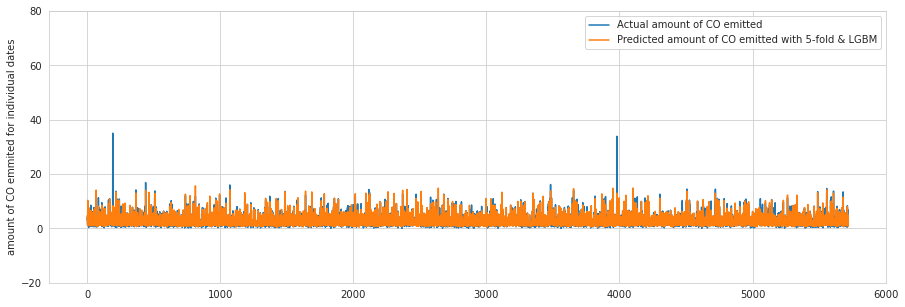

In [54]:
result,b_p = run_LGBM(X_train, y_train)

In [55]:
b_p

{'m__learning_rate': 0.01,
 'm__max_depth': -1,
 'm__n_estimators': 5000,
 'm__num_leaves': 30,
 'm__reg_alpha': 10,
 'm__reg_lambda': 20}

In [56]:
LGBM_model = LGBMRegressor(**b_p)
LGBM_model.fit(X_train, y_train)
train_preds = LGBM_model.predict(X_train)
test_preds = LGBM_model.predict(X_test)

[LightGBM] [Warning] Unknown parameter: m__num_leaves
[LightGBM] [Warning] Unknown parameter: m__reg_alpha
[LightGBM] [Warning] Unknown parameter: m__n_estimators
[LightGBM] [Warning] Unknown parameter: m__learning_rate
[LightGBM] [Warning] Unknown parameter: m__max_depth
[LightGBM] [Warning] Unknown parameter: m__reg_lambda


In [57]:
test_rmse = np.sqrt(mean_squared_error(y_test, (test_preds)))
train_rmse = np.sqrt(mean_squared_error(y_train, (train_preds)))
print('RMSE on test data: ', test_rmse)
print('RMSE on train data: ', train_rmse)

RMSE on test data:  0.7241383218909683
RMSE on train data:  0.5720250473893216


In [58]:
os.getcwd()

'/home/sahil/Supply_Chain/notebooks/Dhanya/emission'

In [59]:
import pickle
import os
os.chdir('/home/sahil/Supply_Chain/notebooks/Dhanya/emission')
filename = 'CO_lgbm_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(LGBM_model, file)
with open(filename, 'rb') as file:
    LGBM_model = pickle.load(file)

<AxesSubplot:>

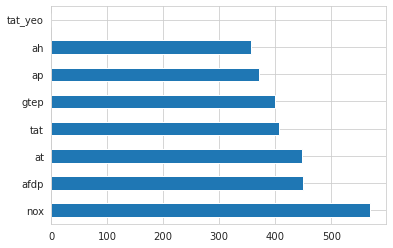

In [60]:
feat_importances = pd.Series(LGBM_model.feature_importances_, index=X_test.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [65]:
!pip install --upgrade witwidget

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
  Using cached witwidget-1.6.0-py2-none-any.whl (2.3 MB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached google_api_python_client-1.12.11-py2.py3-none-any.whl (62 kB)
  Using cached httplib2-0.20.4.tar.gz (349 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached rsa-4.7.1.tar.gz (38 kB)
ERROR: Package 'rsa' requires a different Python: 2.7.15 not in '>=3.5, <4'


In [172]:
#@title Define helper functions {display-mode: "form"}

import pandas as pd
import numpy as np
import tensorflow as tf
import functools

# Creates a tf feature spec from the dataframe and columns specified.
def create_feature_spec(df, columns=None):
    feature_spec = {}
    if columns == None:
        columns = df.columns.values.tolist()
    for f in columns:
        if df[f].dtype is np.dtype(np.int64):
            feature_spec[f] = tf.io.FixedLenFeature(shape=(), dtype=tf.int64)
        elif df[f].dtype is np.dtype(np.float64):
            feature_spec[f] = tf.io.FixedLenFeature(shape=(), dtype=tf.float32)
        else:
            feature_spec[f] = tf.io.FixedLenFeature(shape=(), dtype=tf.string)
    return feature_spec

# Creates simple numeric and categorical feature columns from a feature spec and a
# list of columns from that spec to use.
#
# NOTE: Models might perform better with some feature engineering such as bucketed
# numeric columns and hash-bucket/embedding columns for categorical features.
def create_feature_columns(columns, feature_spec):
    ret = []
    for col in columns:
        if feature_spec[col].dtype is tf.int64 or feature_spec[col].dtype is tf.float32:
            ret.append(tf.feature_column.numeric_column(col))
        else:
            ret.append(tf.feature_column.indicator_column(
                tf.feature_column.categorical_column_with_vocabulary_list(col, list(df[col].unique()))))
    return ret

# An input function for providing input to a model from tf.Examples
def tfexamples_input_fn(examples, feature_spec, label, mode=tf.estimator.ModeKeys.EVAL,
                       num_epochs=None, 
                       batch_size=64):
    def ex_generator():
        for i in range(len(examples)):
            yield examples[i].SerializeToString()
    dataset = tf.data.Dataset.from_generator(
      ex_generator, tf.dtypes.string, tf.TensorShape([]))
    if mode == tf.estimator.ModeKeys.TRAIN:
        dataset = dataset.shuffle(buffer_size=2 * batch_size + 1)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(lambda tf_example: parse_tf_example(tf_example, label, feature_spec))
    dataset = dataset.repeat(num_epochs)
    return dataset

# Parses Tf.Example protos into features for the input function.
def parse_tf_example(example_proto, label, feature_spec):
    parsed_features = tf.io.parse_example(serialized=example_proto, features=feature_spec)
    target = parsed_features.pop(label)
    return parsed_features, target

# Converts a dataframe into a list of tf.Example protos.
def df_to_examples(df, columns=None):
    examples = []
    if columns == None:
        columns = df.columns.values.tolist()
    for index, row in df.iterrows():
        example = tf.train.Example()
        for col in columns:
            if df[col].dtype is np.dtype(np.int64) or df[col].dtype is np.dtype(np.int32):
                example.features.feature[col].int64_list.value.append(int(row[col]))
            elif df[col].dtype is np.dtype(np.float64):
                example.features.feature[col].float_list.value.append(row[col])
            elif row[col] == row[col]:
                example.features.feature[col].bytes_list.value.append(row[col].encode('utf-8'))
        examples.append(example)
    return examples

# Converts a dataframe column into a column of 0's and 1's based on the provided test.
# Used to force label columns to be numeric for binary classification using a TF estimator.
def make_label_column_numeric(df, label_column, test):
    df[label_column] = np.where(test(df[label_column]), 1, 0)

In [173]:
X_train.head()

,at,ap,ah,afdp,gtep,tat,nox,tat_yeo
0,17.6160,1005.9,93.803,2.7599,20.100,550.31,56.334,5.378882e+152
1,15.9020,1006.5,93.727,3.0559,19.310,549.97,63.453,5.195107e+152
2,17.4130,1003.7,90.046,3.2632,24.263,550.08,59.609,5.253878e+152
3,10.3430,1015.0,89.169,2.6149,19.254,542.47,104.460,2.399769e+152
4,9.7887,1019.2,89.052,4.3085,33.330,527.35,65.067,4.893805e+151


In [174]:
train_df = pd.concat([X_train.reset_index(drop=True),
                     y_train.reset_index(drop=True)],
                    axis=1)

test_df = pd.concat([X_test.reset_index(drop=True),
                    y_test.reset_index(drop=True)],
                   axis=1)
train_df.shape, test_df.shape

((5721, 9), (1431, 9))

In [175]:
train_df.dtypes

at         float64
ap         float64
ah         float64
afdp       float64
gtep       float64
tat        float64
nox        float64
tat_yeo    float64
co         float64
dtype: object

In [176]:
for col in train_df.columns:
    train_df[col] = pd.to_numeric(train_df[col], 
                                  errors='coerce')

In [177]:
for col in test_df.columns:
    test_df[col] = pd.to_numeric(test_df[col], 
                                  errors='coerce')

In [178]:
train_df.columns = train_df.columns.str.upper()
test_df.columns = test_df.columns.str.upper()

In [179]:
train_df.head()

,AT,AP,AH,AFDP,GTEP,TAT,NOX,TAT_YEO,CO
0,17.6160,1005.9,93.803,2.7599,20.100,550.31,56.334,5.378882e+152,3.1179
1,15.9020,1006.5,93.727,3.0559,19.310,549.97,63.453,5.195107e+152,4.1992
2,17.4130,1003.7,90.046,3.2632,24.263,550.08,59.609,5.253878e+152,1.4254
3,10.3430,1015.0,89.169,2.6149,19.254,542.47,104.460,2.399769e+152,9.3414
4,9.7887,1019.2,89.052,4.3085,33.330,527.35,65.067,4.893805e+151,1.0643


In [180]:
test_df.head()

,AT,AP,AH,AFDP,GTEP,TAT,NOX,TAT_YEO,CO
0,28.8550,1010.8,54.693,5.1127,26.536,549.84,68.349,5.126482e+152,1.1319
1,12.5900,1011.9,92.735,3.0710,22.114,548.11,80.069,4.293750e+152,4.3255
2,22.1930,1001.9,71.907,3.8040,25.359,550.19,65.695,5.313302e+152,1.4060
3,14.9470,1010.9,89.470,3.3885,24.645,550.04,69.398,5.232431e+152,1.7244
4,9.3145,1008.9,88.841,3.0141,23.986,549.30,84.768,4.850831e+152,3.2823


In [181]:
train_df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TAT', 'NOX', 'TAT_YEO', 'CO'], dtype='object')

In [182]:
label_column = 'CO'

input_features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP',
                  'TAT', 'NOX', 'TAT_YEO']

features_and_labels = input_features + [label_column]

In [183]:
examples = df_to_examples(train_df)

In [185]:
pip install witwidget

     |████████████████████████████████| 1.5 MB 2.2 MB/s eta 0:00:01�███████████████████████████▊| 1.5 MB 2.2 MB/s eta 0:00:01
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
     |████████████████████████████████| 9.0 MB 18.4 MB/s eta 0:00:01460 kB 18.4 MB/s eta 0:00:01 eta 0:00:01��████████████████▊             | 5.3 MB 18.4 MB/s eta 0:00:01��██████▎ | 8.5 MB 18.4 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 1.5 MB/s  eta 0:00:01
     |████████████████████████████████| 114 kB 55.2 MB/s eta 0:00:01
     |████████████████████████████████| 211 kB 55.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [186]:
num_datapoints = 1000
tool_height_in_px = 1000

from witwidget.notebook.visualization import WitConfigBuilder
from witwidget.notebook.visualization import WitWidget

# Load up the test dataset

test_examples = df_to_examples(test_df[
    0:num_datapoints])

# Setup the tool with the test examples and the trained classifier
config_builder = WitConfigBuilder(test_examples[0:
            num_datapoints]
                ).set_estimator_and_feature_spec(
    LGBM_model, feature_spec
     ).set_model_type('regression')

WitWidget(config_builder, height=tool_height_in_px)

WitWidget(config={'model_type': 'regression', 'label_vocab': [], 'are_sequence_examples': False, 'inference_ad…

In [ ]:
# X_test

In [190]:
def adjust_prediction(z):
    return LGBM_model.predict(z)

In [191]:
num_datapoints = 1000
tool_height_in_px = 1000
test_examples = test_examples

config_builder = (WitConfigBuilder(
    test_examples[0:num_datapoints], 
    X_test.columns.tolist() 
    + ["CO"])
  .set_custom_predict_fn(adjust_prediction)
  .set_target_feature('CO')
  .set_model_type('regression'))


WitWidget(config_builder, height=tool_height_in_px)

WitWidget(config={'model_type': 'regression', 'label_vocab': [], 'feature_names': ['at', 'ap', 'ah', 'afdp', '…